In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [3]:
#data = pd.read_json('data2\\entries__to_2017-10-01.json')
treatments = pd.read_csv('treatments_combined.json', low_memory=False, parse_dates=True, )
print(treatments.shape)
treatments.head()


(251298, 45)


,Unnamed: 0,CMR,Site-change,_body,_date,_description,_head,_id,_type,absolute,...,tail,targetBottom,targetTop,temp,timeFormat,timestamp,type,units,uuid,wizard
0,0,NaN,NaN,NaN,NaN,NaN,NaN,5a8a5722b08ad27a969f7086,NaN,1.250,...,NaN,NaN,NaN,NaN,NaN,2018-02-19 04:47:53,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,5a8a52e9b08ad27a969dfdea,NaN,1.150,...,NaN,NaN,NaN,NaN,NaN,2018-02-19 04:29:57,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,5a8a5181b08ad27a969d8405,NaN,0.625,...,NaN,NaN,NaN,NaN,NaN,2018-02-19 04:23:38,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,5a8a09e9b08ad27a968bd1ba,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,IFTTT-button,NaN,NaN,NaN,NaN,NaN,5a8a076bb08ad27a968b668a,NaN,NaN,...,NaN,75.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#data = pd.read_json('data2\\entries__to_2017-10-01.json')
entries = pd.read_csv('entries_combined.json', low_memory=False)
print(entries.shape)
entries.head()


(644258, 22)


,id,_id,date,dateString,delta,device,direction,display_time,filtered,glucose,...,noise,rssi,scale,sgv,slope,sysTime,system_time,trend_arrow,type,unfiltered
0,0,5a8a12774594dc43b99e99a7,2018-02-18 23:55:33.613,2018-02-18T18:55:33.613000-05:00,NaN,xDrip-DexbridgeWixel,SingleUp,NaN,218688.0,229.0,...,1.0,100.0,NaN,229.0,NaN,NaN,NaN,NaN,sgv,234784.0
1,1,5a8a12774594dc43b99e99a7,2018-02-18 23:55:33.613,2018-02-18T18:55:33.613-0500,NaN,xDrip-DexbridgeWixel,SingleUp,NaN,218688.0,NaN,...,1.0,100.0,NaN,229.0,NaN,NaN,NaN,NaN,sgv,234784.0
2,2,5a8a114b4594dc43b99e99a4,2018-02-18 23:50:33.880,2018-02-18T18:50:33.880-0500,NaN,xDrip-DexbridgeWixel,Flat,NaN,209568.0,NaN,...,1.0,100.0,NaN,215.0,NaN,NaN,NaN,NaN,sgv,220736.0
3,3,5a8a101f4594dc43b99e99a1,2018-02-18 23:45:34.112,2018-02-18T18:45:34.112000-05:00,NaN,xDrip-DexbridgeWixel,SingleUp,NaN,200864.0,211.0,...,1.0,100.0,NaN,211.0,NaN,NaN,NaN,NaN,sgv,216608.0
4,4,5a8a101f4594dc43b99e99a1,2018-02-18 23:45:34.112,2018-02-18T18:45:34.112-0500,NaN,xDrip-DexbridgeWixel,SingleUp,NaN,200864.0,NaN,...,1.0,100.0,NaN,211.0,NaN,NaN,NaN,NaN,sgv,216608.0


In [8]:
treatments.columns

Index(['Unnamed: 0', 'CMR', 'Site-change', '_body', '_date', '_description',
       '_head', '_id', '_type', 'absolute', 'amount', 'appended', 'bg',
       'bolus', 'boluscalc', 'carbs', 'changed', 'created_at', 'duration',
       'enteredBy', 'eventType', 'fixed', 'glucose', 'glucoseType', 'insulin',
       'maxBasal', 'medtronic', 'notes', 'preBolus', 'rate', 'ratio',
       'raw_duration', 'raw_rate', 'reason', 'stale', 'tail', 'targetBottom',
       'targetTop', 'temp', 'timeFormat', 'timestamp', 'type', 'units', 'uuid',
       'wizard'],
      dtype='object')

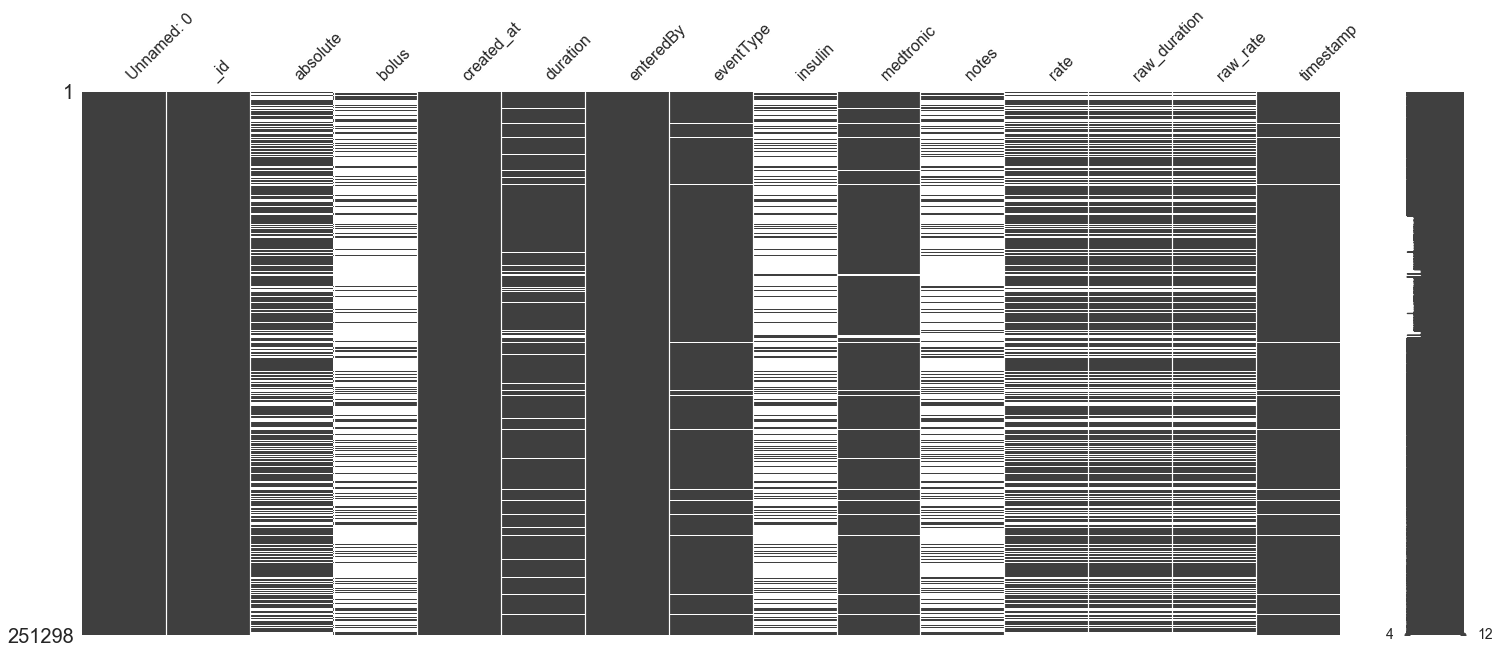

In [9]:
# missing data
treatments = treatments.dropna(how='any', axis=1, thresh=10000)
msno.matrix(check)

In [12]:
treatments.head(20)

,Unnamed: 0,_id,absolute,bolus,created_at,duration,enteredBy,eventType,insulin,medtronic,notes,rate,raw_duration,raw_rate,timestamp
0,0,5a8a5722b08ad27a969f7086,1.250,NaN,2018-02-19 04:47:53.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,1.25,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T23:47:5...,2018-02-19 04:47:53
1,1,5a8a52e9b08ad27a969dfdea,1.150,NaN,2018-02-19 04:29:57.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,1.15,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T23:29:5...,2018-02-19 04:29:57
2,2,5a8a5181b08ad27a969d8405,0.625,NaN,2018-02-19 04:23:38.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,0.625,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T23:23:3...,2018-02-19 04:23:38
3,3,5a8a09e9b08ad27a968bd1ba,NaN,NaN,2018-02-18 23:19:05.119,NaN,AAOXSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5a8a076bb08ad27a968b668a,NaN,NaN,2018-02-18 23:08:27.957,120.0,NaN,Temporary Target,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5a8a4dfcb08ad27a969c5215,1.350,NaN,2018-02-19 04:08:22.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,1.35,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T23:08:2...,2018-02-19 04:08:22
6,6,5a8a4b2eb08ad27a969b634d,0.625,NaN,2018-02-19 03:56:29.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,0.625,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T22:56:2...,2018-02-19 03:56:29
7,7,5a8a4b2eb08ad27a969b634f,NaN,"{'programmed': 0.1, '_description': 'Bolus 201...",2018-02-19 03:54:08.000,0.0,EY209W,Correction Bolus,0.1,mm://openaps/mm-format-ns-treatments/Correctio...,"Normal bolus (solo, no bolus wizard).\r\nProgr...",NaN,NaN,NaN,2018-02-19 03:54:08
8,8,5a8a4b2eb08ad27a969b6351,1.100,NaN,2018-02-19 03:53:42.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,1.1,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T22:53:4...,2018-02-19 03:53:42
9,9,5a8a491cb08ad27a969ab558,0.625,NaN,2018-02-19 03:48:11.000,30.0,EY209W,Temp Basal,NaN,mm://openaps/mm-format-ns-treatments/Temp Basal,NaN,0.625,{'_description': 'TempBasalDuration 2018-02-18...,{'_description': 'TempBasal 2018-02-18T22:48:1...,2018-02-19 03:48:11


In [10]:
treatments.isnull().sum()

Unnamed: 0           0
_id                  0
absolute         72496
bolus           194222
created_at           0
duration         13428
enteredBy         1638
eventType         4398
insulin         191446
medtronic         9164
notes           188320
rate             72480
raw_duration     72500
raw_rate         72500
timestamp         6414
dtype: int64

In [7]:
check.dtypes

Unnamed: 0        int64
_id              object
absolute        float64
bolus            object
created_at       object
duration        float64
enteredBy        object
eventType        object
insulin         float64
medtronic        object
notes            object
rate             object
raw_duration     object
raw_rate         object
timestamp        object
dtype: object

In [4]:
entries.isnull().sum()

id                   0
_id                  0
date                 0
dateString           0
delta           643834
device               0
direction         4264
display_time    643058
filtered          4304
glucose         303058
intercept       642128
mbg             642124
noise             5464
rssi              4304
scale           642128
sgv               4264
slope           642128
sysTime         643834
system_time     643058
trend_arrow     643058
type                 0
unfiltered        4304
dtype: int64